In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prediction Question

What song attributes, platform features, temporal factors, and artist characteristics can be used to predict the number of streams a song will recieve.

In [40]:
# Read in data
df = pd.read_csv('/Users/johnjordan/Desktop/DS 3001/Spotify Most Streamed Songs.csv')
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [41]:
df.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
cover_url                0
dtype: int64

In [42]:
# Dropping columns we don't need and dropping NA values
df = df.drop(['cover_url', 'released_day'], axis=1)
df = df.dropna()
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,553,147,141381703,43,263,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,1474,48,133716286,48,126,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,1397,113,140003974,94,207,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,7858,100,800840817,116,207,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,3133,50,303236322,84,133,...,144,A,Minor,65,23,80,14,63,11,6


Out of the 953 records in our dataset, only two columns have NA values, in_shazam_charts and key. These columns have 50 and 95 NA values respectively. Because this is such a small portion of our data, we chose to simply drop these data in order to begin our regression.

In [43]:
# Removing NA values gets rid of 136 rows
df.describe()

,artist_count,released_year,released_month,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000
mean,1.567931,2018.457772,6.018360,4849.898409,11.722154,60.161567,49.473684,2.451652,122.565483,67.391677,51.201958,64.362301,26.309670,1.676867,18.168911,10.526316
std,0.876211,10.829267,3.572554,7741.126455,18.617668,74.923594,49.570455,5.397024,28.174803,14.688458,23.620978,16.107587,25.470972,8.767328,13.541996,10.219987
min,1.000000,1930.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2021.000000,3.000000,829.000000,0.000000,12.000000,6.000000,0.000000,99.000000,57.000000,32.000000,53.000000,5.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,5.000000,2040.000000,3.000000,32.000000,34.000000,0.000000,120.000000,70.000000,51.000000,66.000000,17.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,4890.000000,16.000000,78.000000,84.000000,2.000000,141.000000,79.000000,70.000000,76.000000,41.000000,0.000000,24.000000,12.000000
max,8.000000,2023.000000,12.000000,52898.000000,147.000000,532.000000,275.000000,45.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [44]:
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [45]:
# Checking to see if streams is numerical (it's not)
unique_types = df['streams'].apply(type).unique()
print(unique_types)

[<class 'str'>]


Next, we wanted to check to make sure that each of our columns had the correct data type. When doing this, we found that the column streams, in_deezer_playlists, and in_shazam_charts all had object values instead of numerical values.

In [46]:
# Found a strange value in an error later on so replaced it here
index_at_position = df.index[478]
print(f"The index at position 478 is: {index_at_position}")

The index at position 478 is: 574


In [47]:
# Drops the row with index 574
df = df.drop(574)

Later on in our analysis, we found an error with the record at position 478. So, we found the index of the record at this position and chose to drop it because it is such a small piece of our data.

In [48]:
# Converting columns with type 'object' to numeric
cols = ["in_deezer_playlists", "in_shazam_charts", "streams"]

for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [49]:
df.describe()

,artist_count,released_year,released_month,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,816.000000,816.000000,816.000000,816.000000,816.000000,8.160000e+02,816.000000,816.000000,751.000000,816.000000,812.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000
mean,1.568627,2018.517157,6.024510,4852.316176,11.736520,4.689858e+08,60.215686,49.534314,93.544607,2.454657,51.754926,122.580882,67.409314,51.172794,64.356618,26.333333,1.678922,18.170343,10.535539
std,0.876522,10.701973,3.570415,7745.565488,18.624555,5.231267e+08,74.953565,49.570536,155.658936,5.399650,128.813461,28.188643,14.688808,23.620742,16.116646,25.477606,8.772508,13.550239,10.222852
min,1.000000,1930.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2021.000000,3.000000,829.000000,0.000000,1.342848e+08,12.000000,6.000000,12.000000,0.000000,0.000000,99.000000,57.000000,32.000000,53.000000,5.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,5.000000,2037.500000,3.000000,2.638368e+08,32.000000,34.500000,32.000000,0.000000,2.000000,120.000000,70.000000,51.000000,66.000000,17.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,4890.750000,16.000000,6.011986e+08,78.250000,84.000000,99.000000,2.000000,37.000000,141.250000,79.000000,70.000000,76.000000,41.000000,0.000000,24.000000,12.000000
max,8.000000,2023.000000,12.000000,52898.000000,147.000000,3.562544e+09,532.000000,275.000000,964.000000,45.000000,953.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


After determining which columns had the incorrect data type, we coerced each of the records with the incorrect data type to a numerical value.

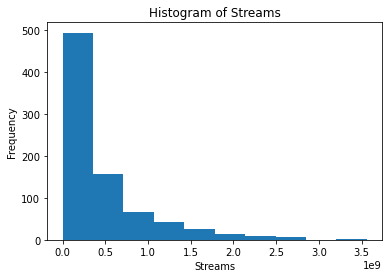

In [50]:
plt.hist(df.streams, bins=10) 
plt.xlabel('Streams')
plt.ylabel('Frequency')
plt.title('Histogram of Streams')
plt.show()

In [51]:
# Converting streams column to log of streams
df['streams'] = np.log(df['streams'])
df.describe()

,artist_count,released_year,released_month,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,751.000000,816.000000,812.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000
mean,1.568627,2018.517157,6.024510,4852.316176,11.736520,19.427594,60.215686,49.534314,93.544607,2.454657,51.754926,122.580882,67.409314,51.172794,64.356618,26.333333,1.678922,18.170343,10.535539
std,0.876522,10.701973,3.570415,7745.565488,18.624555,1.130405,74.953565,49.570536,155.658936,5.399650,128.813461,28.188643,14.688808,23.620742,16.116646,25.477606,8.772508,13.550239,10.222852
min,1.000000,1930.000000,1.000000,31.000000,0.000000,7.923710,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2021.000000,3.000000,829.000000,0.000000,18.715474,12.000000,6.000000,12.000000,0.000000,0.000000,99.000000,57.000000,32.000000,53.000000,5.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,5.000000,2037.500000,3.000000,19.390841,32.000000,34.500000,32.000000,0.000000,2.000000,120.000000,70.000000,51.000000,66.000000,17.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,4890.750000,16.000000,20.214436,78.250000,84.000000,99.000000,2.000000,37.000000,141.250000,79.000000,70.000000,76.000000,41.000000,0.000000,24.000000,12.000000
max,8.000000,2023.000000,12.000000,52898.000000,147.000000,21.993741,532.000000,275.000000,964.000000,45.000000,953.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


When doing the original analysis, we found that the histogram our response variable, streams, was skewed heavily to the left, violating the normality assumption. Therefore, we chose to log the response, streams, in order to fit this assumption.

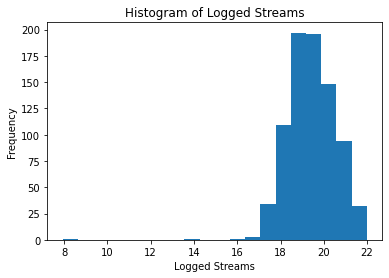

In [52]:
plt.hist(df.streams, bins=20) 
plt.xlabel('Logged Streams')
plt.ylabel('Frequency')
plt.title('Histogram of Logged Streams')
plt.show()

While there is still a small number of outliers, the histogram better fits the normality assumption.

In [65]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

ValueError: could not convert string to float: 'Seven (feat. Latto) (Explicit Ver.)'

We also wanted to look at the correlation map of our variables in order to determine if there would be any multi-collinearity problems with our model. While most of the variables have little to no correlation with each other, there were a few that worried us. Therefore, we chose to use PCA to try to eliminate any multicollinearity problems by eliminating redundant information and making features linearly independent through the creation of new principal components.

In [54]:
# One-hot encoding dummy variables
df = pd.get_dummies(df, columns=['key', 'mode'], drop_first=True)
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,key_B,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Minor
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,553,147,18.766974,43,263,...,True,False,False,False,False,False,False,False,False,False
1,LALA,Myke Towers,1,2023,3,1474,48,18.711231,48,126,...,False,True,False,False,False,False,False,False,False,False
2,vampire,Olivia Rodrigo,1,2023,6,1397,113,18.757181,94,207,...,False,False,False,False,False,True,False,False,False,False
3,Cruel Summer,Taylor Swift,1,2019,8,7858,100,20.501173,116,207,...,False,False,False,False,False,False,False,False,False,False
4,WHERE SHE GOES,Bad Bunny,1,2023,5,3133,50,19.530023,84,133,...,False,False,False,False,False,False,False,False,False,True


In [55]:
df.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists     65
in_deezer_charts         0
in_shazam_charts         4
bpm                      0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
key_A#                   0
key_B                    0
key_C#                   0
key_D                    0
key_D#                   0
key_E                    0
key_F                    0
key_F#                   0
key_G                    0
key_G#                   0
mode_Minor               0
dtype: int64

In [56]:
# Dropping NA after one-hot encoding because we found an error involved with these NA values later on
df = df.dropna()

In order to continue to our analysis, we chose to one-hot encode the variables key and mode. This converted a cateogircal variable into one that the computer can more easily use for analysis by assigning binary values to these variables. However, we also found another 65 NA values in the column 'in_deezer_charts' and 4 in 'in_shazam_charts'. Again, because hey are such a small proportion of the data, and we did not feel that these columns were that influential, we chose to drop these NA values. 

In [58]:
# Create a danceability squared variable to analyze its diminishing effects on streams
df['danceability_squared'] = df['danceability_%'] ** 2

We also chose to add in a new variable, danceability squared, because we thought that there may be diminishing returns to the benefit of danceability in predicting streams.

In [59]:
# Finding number of principal components
numeric_features = df.select_dtypes(include=['number'])
num_components = numeric_features.shape[1]
print(f"Number of principal components: {num_components}")

Number of principal components: 20


   Principal Component  Explained Variance Ratio  Cumulative Variance
0                  PC1                  0.180250             0.180250
1                  PC2                  0.142348             0.322597
2                  PC3                  0.099572             0.422170
3                  PC4                  0.070298             0.492467
4                  PC5                  0.060305             0.552773
5                  PC6                  0.054045             0.606818
6                  PC7                  0.052432             0.659250
7                  PC8                  0.046496             0.705746
8                  PC9                  0.045982             0.751728
9                 PC10                  0.043253             0.794981
10                PC11                  0.037190             0.832171
11                PC12                  0.034652             0.866823
12                PC13                  0.028729             0.895552
13                PC

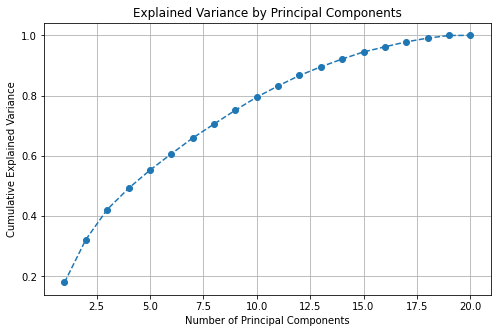

In [60]:
# Disclaimer: Used ChatGPT for part of this

# Performing PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)

# Fit PCA
pca = PCA()
pca.fit(scaled_data)

# Explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

pca_results = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance_ratio))],
    'Explained Variance Ratio': explained_variance_ratio,
    'Cumulative Variance': explained_variance_ratio.cumsum()
})

print(pca_results)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid()
plt.show()

After performing our Principal Component Analysis, we found that there was not a very obvious number of principal components to choose when looking at the tradeoff between explained variance and the number of principal components. However, we settled on 4 because we felt that this was the point where the curve began to flatten, thus representing the diminishing marginal return of an additional component.

In [68]:
# Disclaimer: Used ChatGPT for part of this

# Using LASSO to execute regression analysis
y = df['streams']

X = df.drop(columns=['streams', 'track_name', 'artist(s)_name'])
X_scaled = scaler.fit_transform(X) # Scaling explanatory variables for use in PCA

# PCA
pca = PCA(n_components=4)  # Choosing the number of components
X_pca = pca.fit_transform(X_scaled)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, 
                                                    test_size=0.2, random_state=42)

# LASSO Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predictions
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

# Root Mean Squared Error
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# R-Squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Getting observations and paramaters to calculate adjusted R-Squared
n_train, p = X_train.shape
n_test = X_test.shape[0]

# Adjusted R-Squared
train_adj_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p - 1)
test_adj_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p - 1)

# Table of regression coefficients
coefficients = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(lasso.coef_))],
    'Coefficient': lasso.coef_
})

# Results
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Train R²: {train_r2}")
print(f"Test R²: {test_r2}")
print(f"Train Adjusted R²: {train_adj_r2}")
print(f"Test Adjusted R²: {test_adj_r2}")
print("\nRegression Coefficients Table:")
print(coefficients)

Train RMSE: 0.8607868005349939
Test RMSE: 0.724765449275903
Train R²: 0.3390144668388332
Test R²: 0.46807895955371814
Train Adjusted R²: 0.334555879768606
Test Adjusted R²: 0.45340527567933797

Regression Coefficients Table:
  Principal Component  Coefficient
0                 PC1     0.265791
1                 PC2     0.041785
2                 PC3    -0.189549
3                 PC4    -0.000000


After running our final regression, we found that only the first three principal components had a non-zero coefficient. In turn, when evaluating our model we found that our Test RMSE was relatively low, meaning that the model fits the data relatively well and there is a smaller discrepancy between the values the model predicts and the actual values. Depite the range of values for logged streams being around 15, a Test RMSE of about 0.725 means that the model is inaccurate by about 5% on average. However, when looking at an R-squared of only 0.468 leads us to believe that our model is not entirely sufficient in predicting the number of streams. Furthermore, the adjusted R-squared backs up this hypothesis as the value remains around 0.453, representing that the additional components are not worth the additional predictive ability. We believe that this is because one can not simply predict the number of streams using audio and temporal features. We believe that one of the highest predictive factors will be the artist who releases the song, something that we would include in future models.